Mathias Marciano


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special.lambertw as W
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 120

# Problem 1 â€” Stiff equations

In [25]:
T = 2; N = 30; h = T/N; Lambda = -100; Epsilon =  10**(-3); ###FILL###: Parameters 
g = lambda t : np.tanh(t + 2); g = np.vectorize(g)
g_d = lambda t : 1/np.cosh(t+2)**2 ###FILL###: Derivative of g(t)
f = lambda t, y : Lambda*(y - g(t)) + g_d(t)

#Problem 1.a. *Forward Euler scheme*

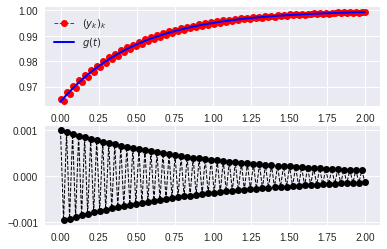

In [17]:
y_EE = np.array([g(0) + Epsilon])

###FILL###: Implement the EE scheme 
for i in range (N):
  y_EE = np.append(y_EE, y_EE[i] + h * f(i*h, y_EE[i]))

# Plots
xx_num = [i*h for i in range(N+1)]; xx_num = np.array(xx_num)
xx_sol = np.linspace(0,T,100*T)

plt.subplot(211)
plt.plot(xx_num, y_EE, marker = "o", ls = "--", lw = "1", c = "red")
plt.plot(xx_sol, g(xx_sol), lw = "2", c = "blue")
plt.legend(("$(y_k)_k$", "$g(t)$"))
plt.subplot(212)
p2 = plt.plot(xx_num, y_EE - g(xx_num),
              marker = "o", ls = "--", lw = "1", c = "k")

Pour N=99, notre approximation de la solution semble diverger de la réelle solution. De plus, le second plot qui représente l'erreur d'approximation (epsilon) augmente au cours du temps.
Pour N=100, il y a une amélioration car notre approximation "colle" avec la solution réelle au cours du temps est l'erreur d'approximation reste constante quelque soit le temps.
Pour N=101, l'approximation colle avec la solution réelle mais de plus, l'erreur d'approximation diminue au cours du temps et semble converger vers 0 ce qui est une bonne approximation.

#Problem 1.b. *4th-order Runge-Kutta scheme*

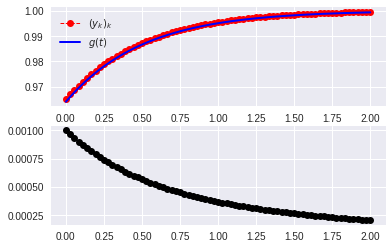

In [24]:
y_RK = np.array([g(0) + Epsilon])

###FILL###: Implement the RK4 scheme 
for i in range(N):
  K1 = f(i*h, y_RK[i])
  K2 = f(i*h + (h/2), y_RK[i] + (h/2) * K1)
  K3 = f(i*h + (h/2), y_RK[i] + (h/2) * K2)
  K4 = f((i+1)*h, y_RK[i] + h * K3)

  S = K1 + 2*K2 + 2*K3 + K4

  y_RK = np.append(y_RK, y_RK[i] + (h/6)*S)
###FILL###: Plot as previously

# Plots
xx_num = [i*h for i in range(N+1)]; xx_num = np.array(xx_num)
xx_sol = np.linspace(0,T,100*T)

plt.subplot(211)
plt.plot(xx_num, y_RK, marker = "o", ls = "--", lw = "1", c = "red")
plt.plot(xx_sol, g(xx_sol), lw = "2", c = "blue")
plt.legend(("$(y_k)_k$", "$g(t)$"))
plt.subplot(212)
p2 = plt.plot(xx_num, y_RK - g(xx_num),
              marker = "o", ls = "--", lw = "1", c = "k")

Pour N=70, notre approximation diverge de la solution réelle au cours du temps et l'erreur d'approximation augmente elle aussi au cours du temps.
Pour N=71, notre approximation semble plus "coller" de la solution réelle mais continue à diverger de cette derniere avec également une erreur d'approximation qui augmente au cours du temps.
Pour N=72, notre approximation colle avec la solution réelle au cours du temps et l'erreur d'approximation semble converge vers 0, on a une bonne approximation de la solution de l'équation ici.

#Problem 1.c. *Regions of stability*

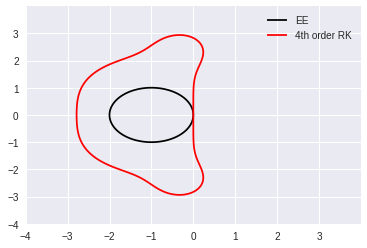

In [8]:
s_EE = lambda z : 1+z ###FILL###: Function s(z) for the EE scheme
s_EE = np.vectorize(s_EE)
s_RK = lambda z : 1+z+(z**2)/2+(z**3/6)+(z**4/24) ###FILL###: Function s(z) for the RK4 scheme
s_RK = np.vectorize(s_RK)


# Contour plots 
xx = np.arange(-4, 4, 10e-3); yy = np.arange(-4, 4, 10e-3)
X, Y = np.meshgrid(xx, yy); C = X + 1j*Y
Z_EE = np.absolute(s_EE(C))
Z_RK = np.absolute(s_RK(C))

_, ax = plt.subplots() 
C_EE = ax.contour(X, Y, Z_EE, levels=[1], colors = "k")
C_RK = ax.contour(X, Y, Z_RK, levels=[1], colors = "r")
doo_EE, _ = C_EE.legend_elements(); doo_RK, _ = C_RK.legend_elements()
ax.legend([doo_EE[0], doo_RK[0]], ['EE', '4th order RK'])

La méthode Runge-Kutta d'ordre 4 est plus performante que la méthode d'Euler explicite car comme on peut le voir sur le graphique ci-dessus, la méthode RK a une région de stabilité beaucoup plus importante que celle de EE. Elle est donc stable dans un plus grand ensemble ce qui fait d'elle une meilleure méthode.

#Problem 1.d. *Backward Euler scheme*

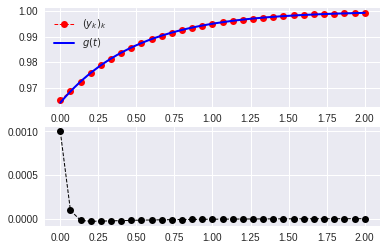

In [26]:
y_EI = np.array([g(0) + Epsilon])

###FILL###: Implement the EI scheme 
for i in range(N):
    y_EI=np.append(y_EI,((y_EI[i]-Lambda*h*g((i+1)*h)+h*g_d((i+1)*h))/(1-h*Lambda)))


###FILL###: Plot as previously
xx_num = [i*h for i in range(N+1)]; xx_num = np.array(xx_num)
xx_sol = np.linspace(0,T,100*T)

plt.subplot(211)
plt.plot(xx_num, y_EI, marker = "o", ls = "--", lw = "1", c = "red")
plt.plot(xx_sol, g(xx_sol), lw = "2", c = "blue")
plt.legend(("$(y_k)_k$", "$g(t)$"))
plt.subplot(212)
p2 = plt.plot(xx_num, y_EI - g(xx_num),
              marker = "o", ls = "--", lw = "1", c = "k")

On remarque que si on fait varier N, les plot ne varient pas de façon importante et notre approximation "colle" toujours avec la solution réelle avec une erreur d'approximation qui converge vers 0 très rapidement. Cette méthode d'Euler implicite constitue alors une très bonne méthode d'approximation pour ce problème.

# Problem 2 â€” Orders of convergence

In [30]:
f_1 = lambda t,y : y; y_10 = 1
y_1 = lambda t: np.exp(t); y_1 = np.vectorize(y_1)
f_2 = lambda t, y : 1 + np.sqrt(y); y_20 = 0
y_2 = lambda t: (1 + W(-np.exp(-1 - t/2) + 10e-10))**2; y_2 = np.vectorize(y_2)

In [50]:
def tau_EE(f, y_0, y_true, T, N):
    tau = np.array([])
    y_EE = [y_0] 
    h = T/N

    for i in range(N):
        y_EE.append(y_EE[i]+h*f(i*h,y_EE[i]))
        tau = np.append(tau, abs(y_EE[i]-y_true(i*h)))

    return(np.max(tau))


def tau_H(f, y_0, y_true, T, N):
    tau = np.array([])
    y_H = [y_0]
    h = T/N
    
    for i in range(N):
        y_H.append(y_H[i]+(h/2)*(f(i*h,y_H[i])+f((i+1)*h,y_H[i]+h*f(i*h,y_H[i]))))
        tau = np.append(tau, abs(y_H[i]-y_true(i*h)))

    return(np.max(tau))

def tau_RK(f, y_0, y_true, T, N):
    tau = np.array([])
    y_RK = [y_0]
    h = T/N

    for i in range(N):
        K1 = f(i*h,y_RK[i])
        K2 = f(i*h+(h/2),y_RK[i]+(h/2)*K1)
        K3 = f(i*h+(h/2),y_RK[i]+(h/2)*K2)
        K4 = f((i+1)*h,y_RK[i]+h*K3)
        y_RK.append(y_RK[i]+(h/6)*(K1+2*K2+2*K3+K4))
        tau = np.append(tau, abs(y_RK[i]-y_true(i*h)))

    return(np.max(tau))


# Problem 2.a. Dynamic $f_1(t,y)$

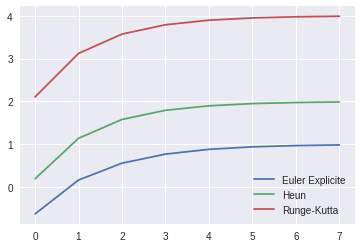

In [70]:
NN = [2**q for q in range(1, 10)]; N_l = len(NN)

T = 2 ###FILL###: Parameter

errors_EE_1 = np.array([tau_EE(f_1, y_10, y_1, T, NN[i]) for i in range(N_l)])
diff_EE_1 = errors_EE_1[:-1]/errors_EE_1[1:]

errors_H_1 = np.array([tau_H(f_1, y_10, y_1, T, NN[i]) for i in range(N_l)]) ###FILL###: As errors_EE_1 but for the H scheme
diff_H_1 = errors_H_1[:-1]/errors_H_1[1:]###FILL###: As diff_EE_1 but for the H scheme

errors_RK_1 = np.array([tau_RK(f_1, y_10, y_1, T, NN[i]) for i in range(N_l)])  ###FILL###: As errors_EE_1 but for the RK4 scheme
diff_RK_1 = errors_RK_1[:-1]/errors_RK_1[1:]  ###FILL###: As diff_EE_1 but for the RK4 scheme

###FILL###: Plot function q -> log_2(tau(...)/tau(...)) for the three schemes
plt.plot(np.log2(diff_EE_1)) 
plt.plot(np.log2(diff_H_1))
plt.plot(np.log2(diff_RK_1)) 
plt.legend(["Euler Explicite", "Heun", "Runge-Kutta"])

L'ordre de convergence de Euler explicite est 1.
L'ordre de convergence de Heun est 2.
L'ordre de convergence de Runge-Kutta est 4.

#Problem 2.b. Dynamic $f_2(t,y)$

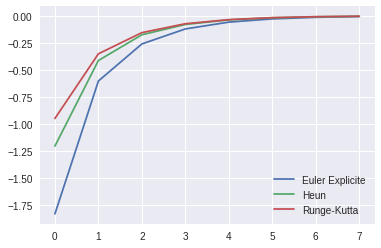

In [71]:
NN = [2**q for q in range(1, 10)]; N_l = len(NN)

T = 2###FILL###: Parameter

errors_EE_2 = np.array([tau_EE(f_2, y_20, y_2, T, NN[i]) for i in range(N_l)]) ###FILL###: Same errors_EE_1 but for the dynamic f_2
errors_H_2 = np.array([tau_H(f_2, y_20, y_2, T, NN[i]) for i in range(N_l)])###FILL###: Same errors_H_1 but for the dynamic f_2
errors_RK_2 = np.array([tau_RK(f_2, y_20, y_2, T, NN[i]) for i in range(N_l)])###FILL###: Same errors_RK4_1 but for the dynamic f_2

diff_EE_2 = errors_EE_2[:-1]/errors_EE_2[1:]
diff_H_2 = errors_H_2[:-1]/errors_H_2[1:]
diff_RK_2 = errors_RK_2[:-1]/errors_RK_2[1:]

###FILL###: Plot the errors q -> tau(...) for the three schemes
plt.plot(np.log2(diff_EE_2)) 
plt.plot(np.log2(diff_H_2))
plt.plot(np.log2(diff_RK_2))
plt.legend(["Euler Explicite", "Heun", "Runge-Kutta"])

Les ordres de convergence de chaque méthode sont inférieur à 0 donc les méthodes ne convergent pas.